In [60]:
# Importación de las librerías que necesitamos:

# Tratamiento de datos
# -----------------------------
import pandas as pd
import numpy as np

# Visualización
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables y la distribución de las variables
# -----------------------------

#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Configuración para visualizar todas las columnas de los DataFrames
# -----------------------------
pd.set_option('display.max_columns', None)

# Gestión de los warnings
# -----------------------------
import warnings
warnings.filterwarnings("ignore")

In [61]:
#Carga del dataset de Spotify:

df = pd.read_csv("files/spotify-2023.csv", encoding="ISO-8859-1")

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [62]:
# Vamos a revisar los datos que tenemos para ver si hay que realizar limpieza

df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [63]:
# Tenemos datos para representar la fecha en tres columnas diferentes ("realesed_year", "realesed_month" y "realesed_day"). Por lo que vamos a unirlo en una sola columna:

df["released_date"] = pd.to_datetime(df["released_day"].astype(str) + "/" + df["released_month"].astype(str) + "/" + df["released_year"].astype(str))

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [64]:
# Ahora que hemos comprobado que se ha añadido la columna de fecha, eliminamos las columnas que no necesitamos:

df.drop(columns=["released_year", "released_month", "released_day"], inplace=True)

df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [65]:
# Revisamos si hay alguna columna duplicada:

df.duplicated().sum()

0

In [66]:

# Vamos a revisar que tipos de datos hay en nuestro dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   artist(s)_name        953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   in_spotify_playlists  953 non-null    int64         
 4   in_spotify_charts     953 non-null    int64         
 5   streams               953 non-null    object        
 6   in_apple_playlists    953 non-null    int64         
 7   in_apple_charts       953 non-null    int64         
 8   in_deezer_playlists   953 non-null    object        
 9   in_deezer_charts      953 non-null    int64         
 10  in_shazam_charts      903 non-null    object        
 11  bpm                   953 non-null    int64         
 12  key                   858 non-null    object        
 13  mode                

In [67]:
# La columna "streams" la vamos a transformar a un formato numérico:

df["streams"] = pd.to_numeric(df["streams"])

ValueError: Unable to parse string "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3" at position 574

In [68]:
# Salta un error en la posición 574, vamos a ver que ocurre:

fila_574 = df.loc[574]
print(fila_574)


track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                                                        0
bpm                                                                   110
key                                                                     A
mode                                  

In [69]:
# Vemos que el valor en "streams" no se podría transformar a número, así que para poder seguir con el análisis, he decidido eliminar esa fila:

df = df.drop([574])

In [70]:
# Ahora sí, voy a transformar la columna "streams" a numérica:

df["streams"] = pd.to_numeric(df["streams"])

In [71]:
# Compruebo para ver que se haya cambiado correctamente:

df["streams"].info()

<class 'pandas.core.series.Series'>
Index: 952 entries, 0 to 952
Series name: streams
Non-Null Count  Dtype
--------------  -----
952 non-null    int64
dtypes: int64(1)
memory usage: 14.9 KB


In [72]:
# Vamos a revisar también si hay alguna canción duplicada (columna "track_name"):

df[df["track_name"].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,0,148,G#,Major,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,0,143,D,Major,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,24,166,C#,Major,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,0,121,G#,Major,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,24,109,A#,Minor,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,1,138,D#,Major,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,0,146,NaN,Major,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,9,120,NaN,Minor,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,353,170,NaN,Major,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,40,145,A,Major,66,24,58,17,0,19,5,1982-05-16


In [73]:
# He decidido ordenar las canciones por número de reproducciones y eliminar así los duplicados que tengan una menor reproducción:

df = df.sort_values(by="streams", ascending=False)

df = df.drop_duplicates(subset="track_name", keep="first")

df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,"3,421",20,NaN,171,C#,Major,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,"6,808",7,0,96,C#,Minor,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,"1,800",0,NaN,110,C#,Major,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,"3,595",6,NaN,98,F#,Minor,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,69,90,D,Major,76,91,50,54,0,7,5,2018-10-09


In [74]:
# Comprobamos que ya no haya canciones duplicadas:

df[df["track_name"].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date


In [75]:
# Voy a revisar el porcentaje de valores nulos en nuestro dataframe:

df.isna().sum()[df.isna().sum() > 0]/df.shape[0]*100

in_shazam_charts    5.307856
key                 9.766454
dtype: float64

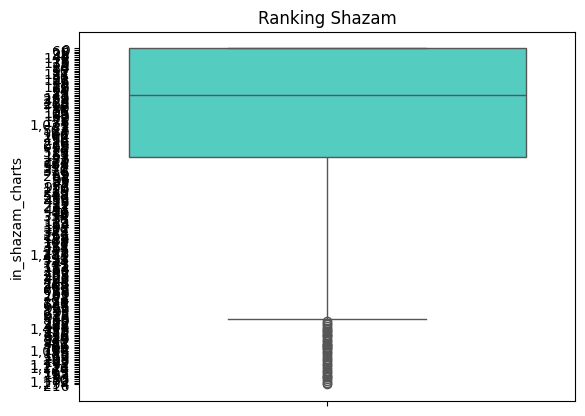

In [76]:
# Para gestionar los nulos de la columna "in_shazam_charts", he decidido realizar un boxplot para ver como de dispersos se encuentran los datos.

sns.boxplot(y = "in_shazam_charts", 
            data = df,
            color = "turquoise")
plt.title("Ranking Shazam");

In [77]:
# Vemos que hay muchos outliers. Finalmente, decido cambiar los valores nulos por "0", ya que podría ser nulo por no encontrarse la canción en el Ranking de Shazam y así, podemos pasar estos datos a numéricos:

df["in_shazam_charts"].fillna(0, inplace=True)

df.isna().sum()[df.isna().sum() > 0]/df.shape[0]*100

key    9.766454
dtype: float64

In [78]:
# La columna "key" es la clave en la que está compuesta la canción. Se ha decidido eliminar esta columna para que no afecte a los datos y así no tengamos nulos:

df.drop(columns= ["key"], inplace=True)

df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,"3,421",20,0,171,Major,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,"6,808",7,0,96,Minor,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,"1,800",0,0,110,Major,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,"3,595",6,0,98,Minor,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,69,90,Major,76,91,50,54,0,7,5,2018-10-09


In [79]:
# Queda la columna "in_deezer_playlists" para pasarla a numérica

df["in_deezer_playlists"] = pd.to_numeric(df["in_deezer_playlists"])

ValueError: Unable to parse string "3,421" at position 0

In [80]:
# Da error porque los miles están escritos con coma, así que vamos a eliminar la coma para poder modificar el tipo de valor:

df["in_deezer_playlists"] = df["in_deezer_playlists"].str.replace(",", "")

In [82]:
# Ahora sí, voy a modificar el tipo de dato:

df["in_deezer_playlists"] = pd.to_numeric(df["in_deezer_playlists"])

df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,3421,20,0,171,Major,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,6808,7,0,96,Minor,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,1800,0,0,110,Major,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,3595,6,0,98,Minor,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,69,90,Major,76,91,50,54,0,7,5,2018-10-09


In [84]:
# Compruebo el tipo de dato: 

df["in_deezer_playlists"].info()

<class 'pandas.core.series.Series'>
Index: 942 entries, 55 to 123
Series name: in_deezer_playlists
Non-Null Count  Dtype
--------------  -----
942 non-null    int64
dtypes: int64(1)
memory usage: 14.7 KB


Visualizaciones

In [85]:
df.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
55,Blinding Lights,The Weeknd,1,43899,69,3703895074,672,199,3421,20,0,171,Major,50,38,80,0,0,9,7,2019-11-29
179,Shape of You,Ed Sheeran,1,32181,10,3562543890,33,0,6808,7,0,96,Minor,83,93,65,58,0,9,8,2017-01-06
86,Someone You Loved,Lewis Capaldi,1,17836,53,2887241814,440,125,1800,0,0,110,Major,50,45,41,75,0,11,3,2018-11-08
620,Dance Monkey,Tones and I,1,24529,0,2864791672,533,167,3595,6,0,98,Minor,82,54,59,69,0,18,10,2019-05-10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,24094,78,2808096550,372,117,843,4,69,90,Major,76,91,50,54,0,7,5,2018-10-09


In [111]:
df_top10 = df.head(10)

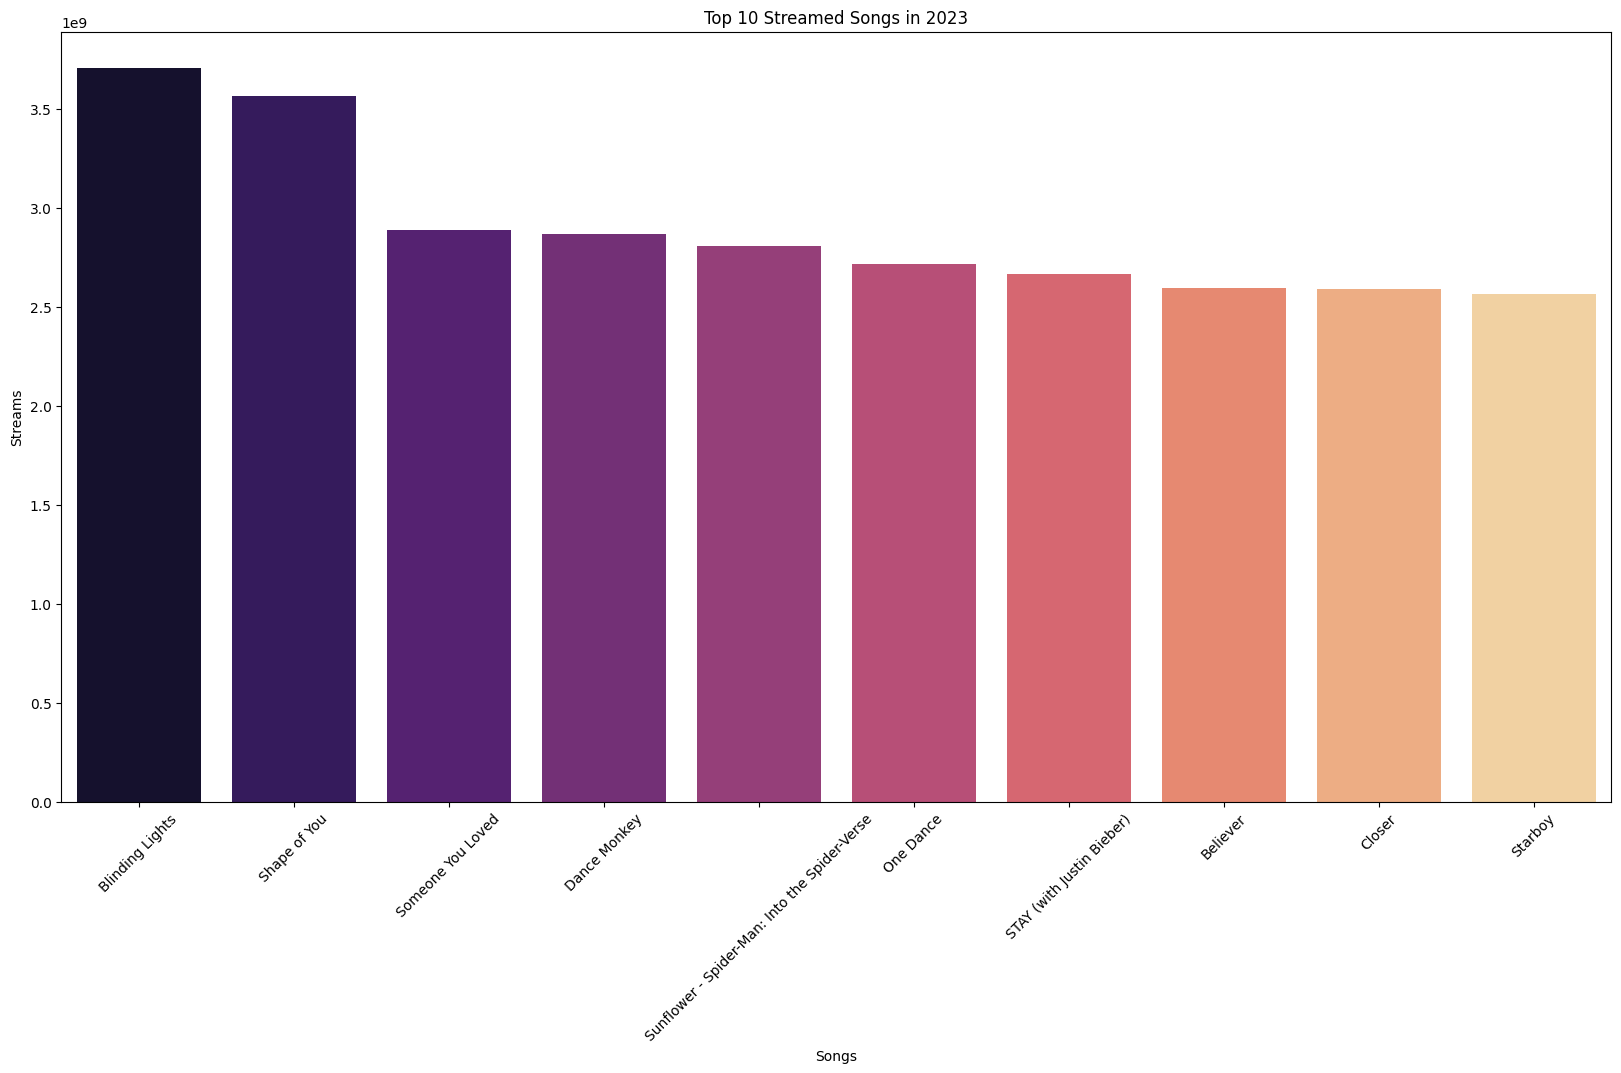

In [112]:
# Visualización Top 10 canciones en Spotify:

plt.figure(figsize = (20, 10))

sns.barplot(x = "track_name", 
            y = "streams",
            data = df_top10,
            palette= "magma"
            )

plt.title('Top 10 Streamed Songs in 2023')
plt.xlabel('Songs')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.show()

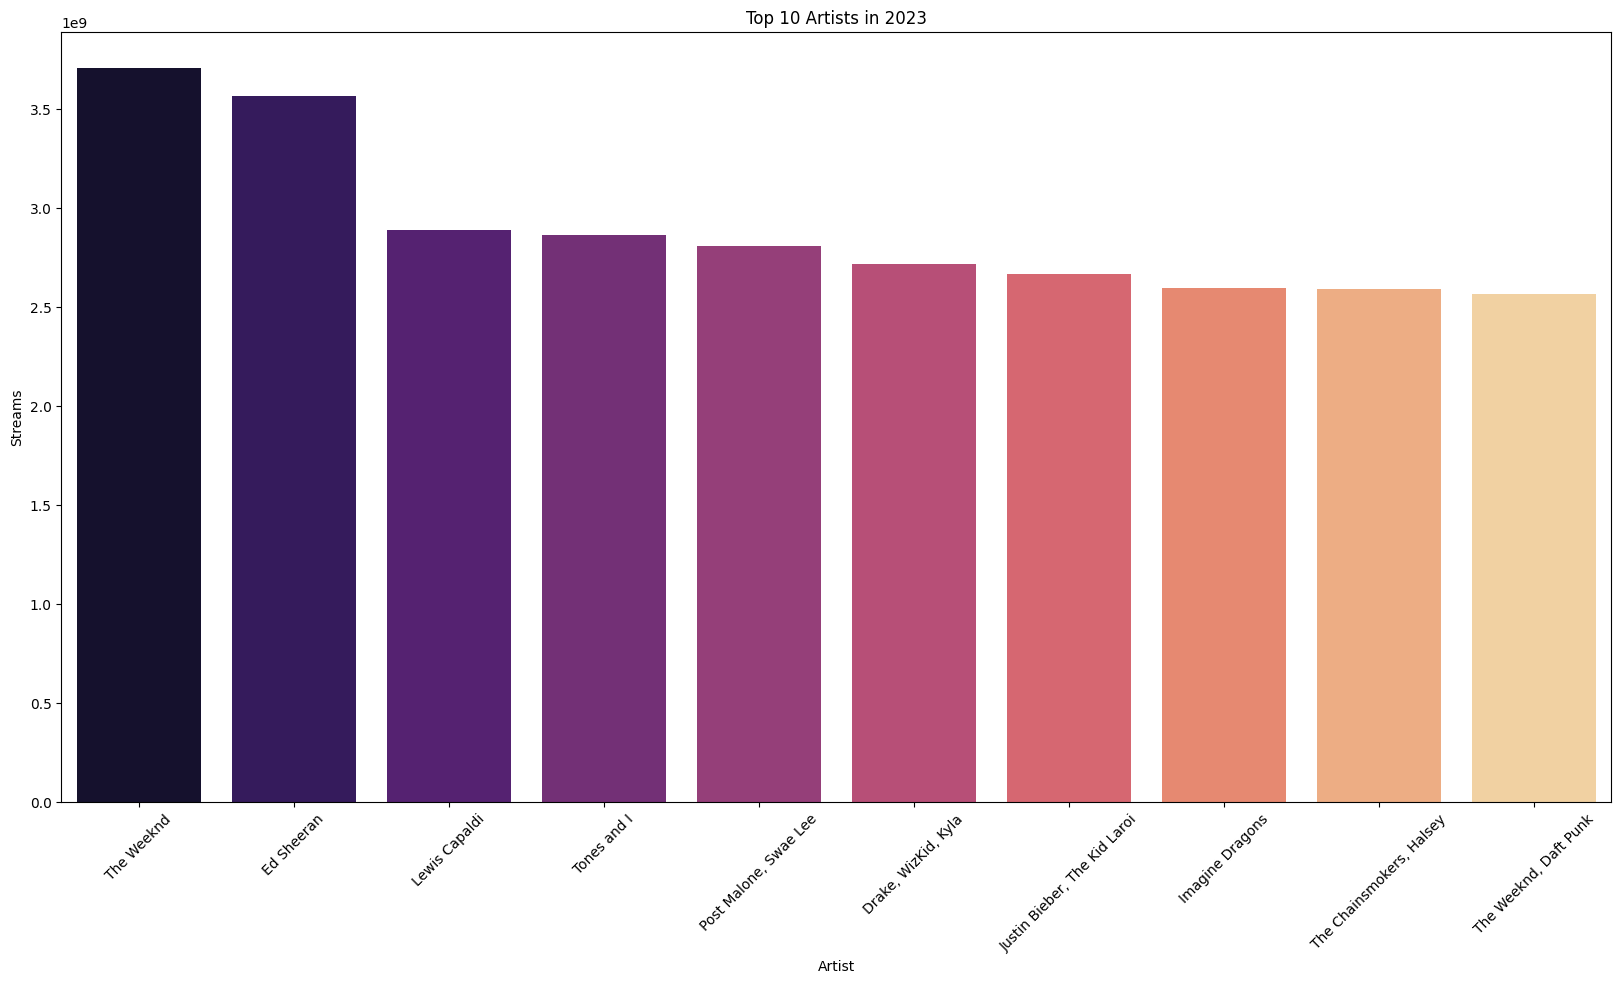

In [113]:
# Visualización Top 10 Artistas en Spotify:

plt.figure(figsize = (20, 10))

sns.barplot(x = "artist(s)_name", 
            y = "streams",
            data = df_top10,
            palette= "magma"
            )

plt.title('Top 10 Artists in 2023')
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.show()
